<a href="https://colab.research.google.com/github/tusker4/Sesac_Saltlux_Team5/blob/sunghee/NAMJUNconcrete_strength_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [259]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [260]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

# Data Loading & Explore the data

In [261]:
# df = pd.read_csv('/content/drive/MyDrive/미니프로젝트(캐글)/train.csv')
# df_test = pd.read_csv('/content/drive/MyDrive/미니프로젝트(캐글)/test.csv')
# submission = pd.read_csv('/content/drive/MyDrive/미니프로젝트(캐글)/sample_submission.csv')

df = pd.read_csv('/content/drive/MyDrive/SeSAC/share/머신러닝/Dataset/Concrete Dataset/train.csv')
df_test = pd.read_csv('/content/drive/MyDrive/SeSAC/share/머신러닝/Dataset/Concrete Dataset/test.csv')
submission = pd.read_csv('/content/drive/MyDrive/SeSAC/share/머신러닝/Dataset/Concrete Dataset/sample_submission.csv')

In [262]:
# Train data
print(df.shape,"\n") # X in R^8 (id colum is just index), y in R^1, # of data : 5407
print(df.info(),"\n") # age in days : int64, others: float64
print(df.isnull().sum(),"\n") # no nulls :-)
df.describe()

(5407, 10) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5407 entries, 0 to 5406
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         5407 non-null   int64  
 1   CementComponent            5407 non-null   float64
 2   BlastFurnaceSlag           5407 non-null   float64
 3   FlyAshComponent            5407 non-null   float64
 4   WaterComponent             5407 non-null   float64
 5   SuperplasticizerComponent  5407 non-null   float64
 6   CoarseAggregateComponent   5407 non-null   float64
 7   FineAggregateComponent     5407 non-null   float64
 8   AgeInDays                  5407 non-null   int64  
 9   Strength                   5407 non-null   float64
dtypes: float64(8), int64(2)
memory usage: 422.5 KB
None 

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent           

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
count,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000,5407.000000
mean,2703.000000,299.168189,58.610579,31.872795,185.076235,4.108441,992.000718,771.219974,51.751618,35.452071
std,1561.010784,105.537682,83.417801,54.605003,18.517583,5.692296,77.148010,78.725253,70.006975,16.401896
min,0.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,1351.500000,213.700000,0.000000,0.000000,175.100000,0.000000,938.200000,734.300000,7.000000,23.640000
50%,2703.000000,297.200000,0.000000,0.000000,187.400000,0.000000,978.000000,781.200000,28.000000,33.950000
75%,4054.500000,375.000000,122.600000,79.000000,192.000000,8.050000,1047.000000,821.000000,56.000000,45.850000
max,5406.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [263]:
# Test data
print(df_test.shape,"\n") # X in R^8 (id colum is just index), y none, # of data : 3605
print(df_test.info(),"\n") # age in days : int64, others: float64
print(df_test.isnull().sum(),"\n") # no nulls :-)
df_test.describe()

(3605, 9) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3605 entries, 0 to 3604
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   id                         3605 non-null   int64  
 1   CementComponent            3605 non-null   float64
 2   BlastFurnaceSlag           3605 non-null   float64
 3   FlyAshComponent            3605 non-null   float64
 4   WaterComponent             3605 non-null   float64
 5   SuperplasticizerComponent  3605 non-null   float64
 6   CoarseAggregateComponent   3605 non-null   float64
 7   FineAggregateComponent     3605 non-null   float64
 8   AgeInDays                  3605 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 253.6 KB
None 

id                           0
CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateCompon

,id,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays
count,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000,3605.000000
mean,7209.000000,299.943523,55.803273,32.829154,184.345825,4.194230,990.222330,774.736311,49.153398
std,1040.818188,104.809283,80.938863,55.490684,17.964842,5.807567,76.812197,77.412505,63.564334
min,5407.000000,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000
25%,6308.000000,213.800000,0.000000,0.000000,174.900000,0.000000,938.200000,739.300000,7.000000
50%,7209.000000,300.000000,0.000000,0.000000,188.500000,0.000000,977.600000,781.500000,28.000000
75%,8110.000000,374.000000,117.200000,90.000000,192.000000,8.100000,1047.000000,821.000000,56.000000
max,9011.000000,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000


In [264]:
# Function for Data preprocessing

def DataPreprocessing(X):
    # id to column
    X = X.set_index('id', inplace=True)
    return X

In [265]:
# Applying data preprocessing
DataPreprocessing(df)
DataPreprocessing(df_test)

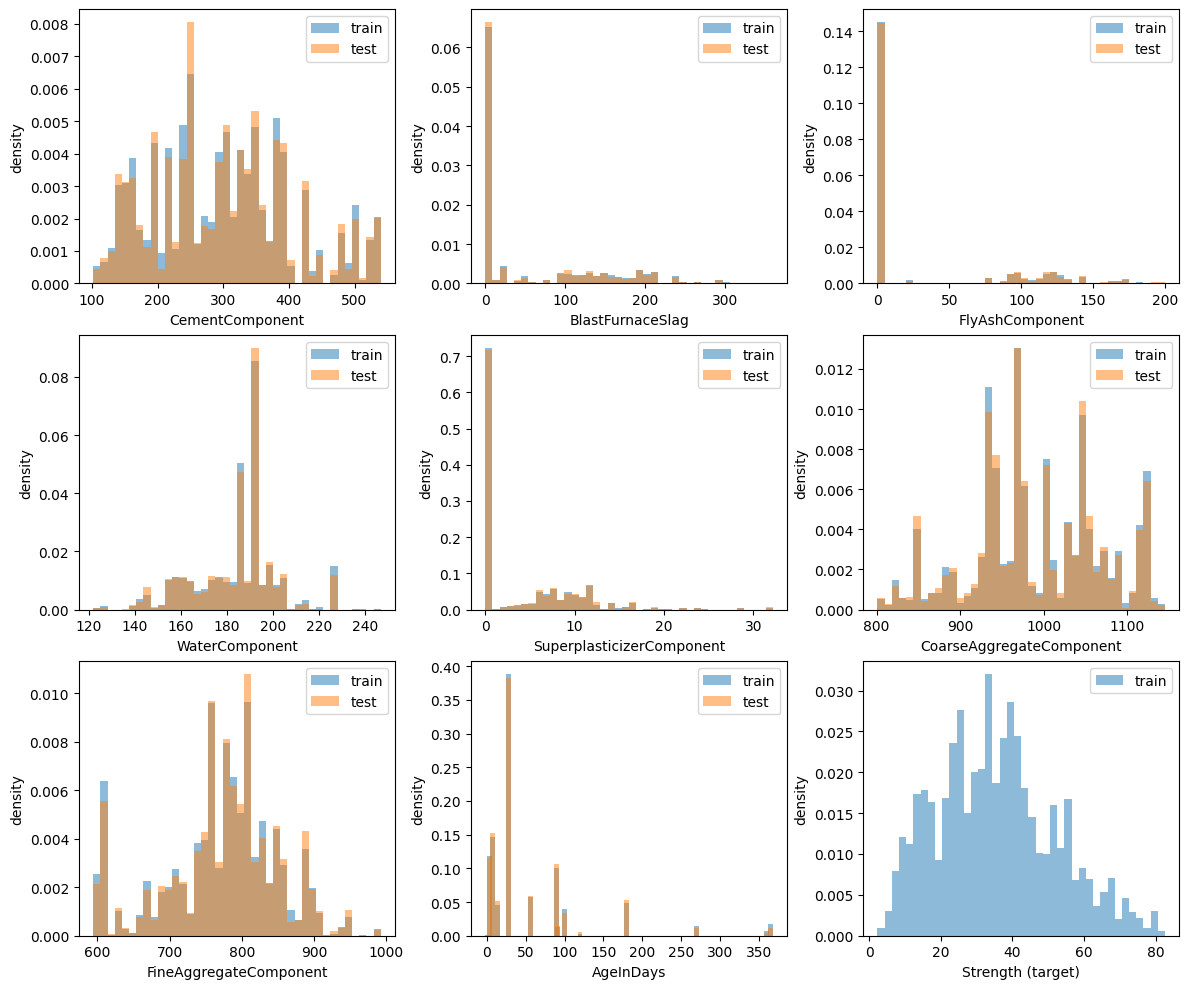

In [266]:
# Visualization

target = 'Strength'
def analyze(train, test, col, ax):
    bins = 40
    column = train[col]
    if col in test.columns:
        both = np.hstack([column.values, test[col].values])
    else:
        both = column
    uni = np.unique(column)
    unival = len(uni)
    if unival < bins:
        vc_tr = column.value_counts().sort_index() / len(train)
        if col in test.columns:
            vc_te = test[col].value_counts().sort_index() / len(test)
            ax.bar(vc_tr.index, vc_tr, width=6, label='train', alpha=0.5)
            ax.bar(vc_te.index, vc_te, width=6, label='test', alpha=0.5)
        else:
            ax.bar(vc_tr.index, vc_tr, label='train', alpha=0.5)
        if unival <= 12:
            ax.set_xticks(vc_tr.index)
        else:
            ax.xaxis.set_major_locator(MaxNLocator(integer=True)) # only integer labels
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()
    else:
        hist_bins = np.linspace(both.min(), both.max(), bins+1)
        ax.hist(column, bins=hist_bins, density=True, label='train', alpha=0.5)
        if col in test.columns:
            ax.hist(test[col], bins=hist_bins, density=True, label='test', alpha=0.5)
        ax.set_xlabel(col + (' (target)' if col == target else ''))
        ax.set_ylabel('density')
        ax.legend()


_, axs = plt.subplots(3, 3, figsize=(12, 10))
axs = axs.ravel()
for col, ax in zip(df.columns, axs):
    analyze(df, df_test, col, ax)
plt.tight_layout(h_pad=0.5, w_pad=0.5)
plt.show()

In [267]:
# Correlation
correlation_matrix = df.corr()
correlation_matrix['Strength'].sort_values(ascending = False)

Strength                     1.000000
AgeInDays                    0.334204
SuperplasticizerComponent    0.208249
CementComponent              0.158000
BlastFurnaceSlag             0.057506
FlyAshComponent              0.031606
FineAggregateComponent      -0.073900
CoarseAggregateComponent    -0.098410
WaterComponent              -0.113678
Name: Strength, dtype: float64

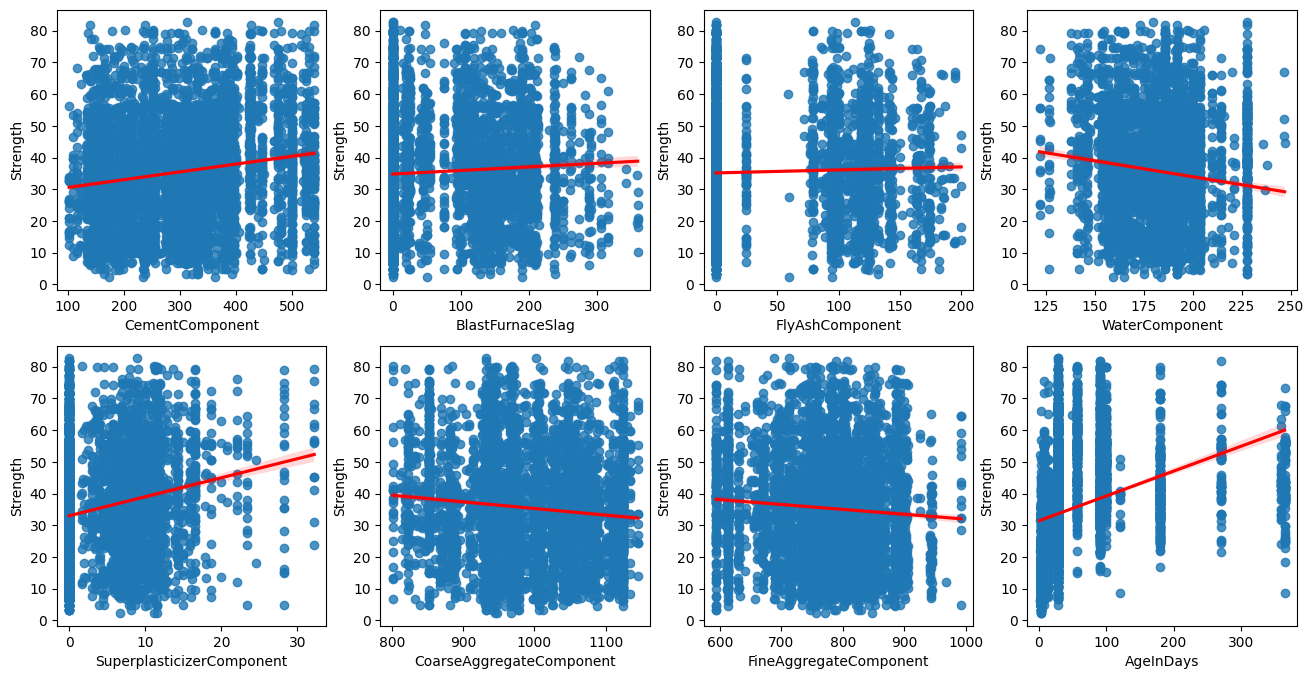

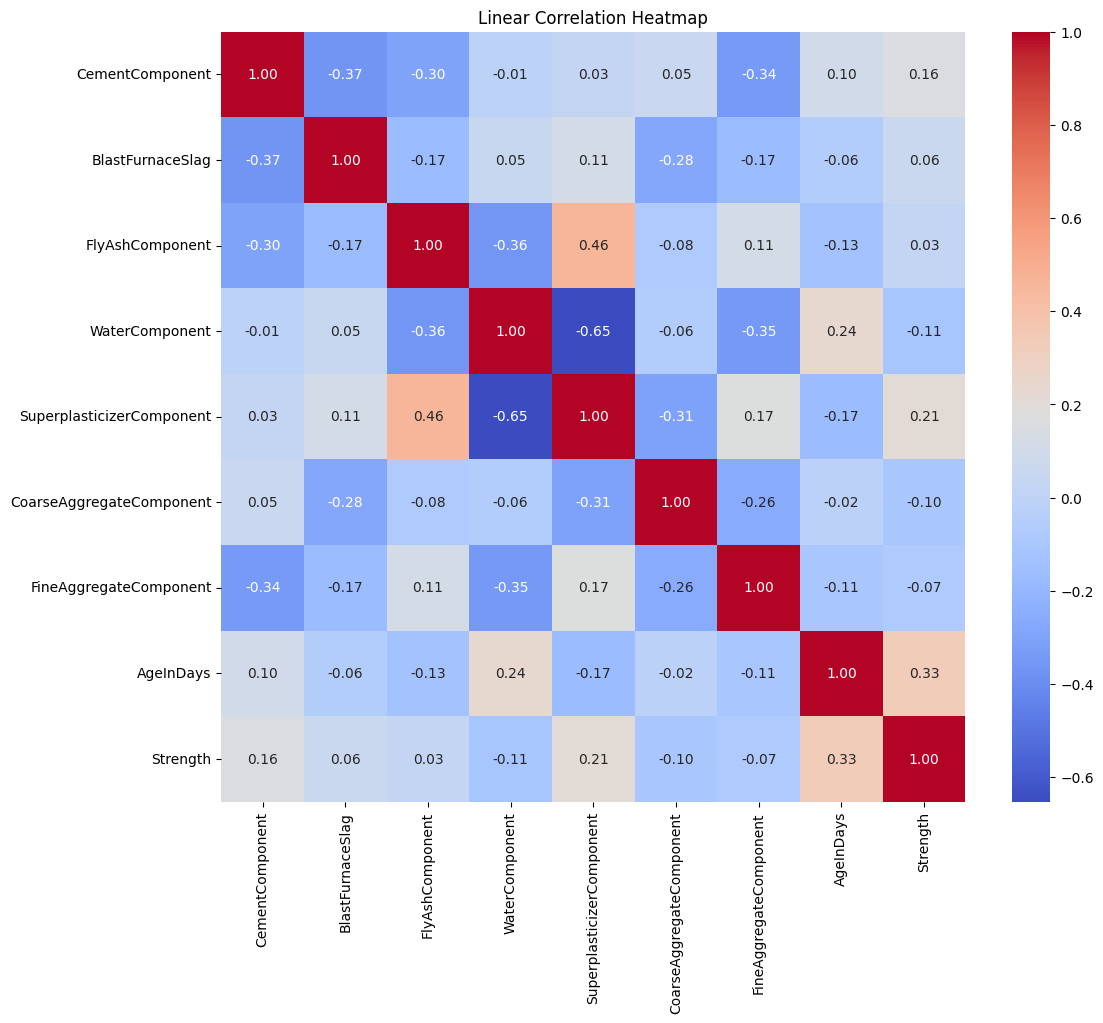

In [268]:
# Correlation

fig, axs = plt.subplots(figsize = (16,8), ncols = 4, nrows = 2)
feats = ['CementComponent', 'BlastFurnaceSlag', 'FlyAshComponent',
       'WaterComponent', 'SuperplasticizerComponent',
       'CoarseAggregateComponent', 'FineAggregateComponent', 'AgeInDays']

for idx, feat in enumerate(feats):
  # 회귀선 + 데이터포인트
  sns.regplot(x = feat, y = df.Strength, data = df,
              ax = axs[int(idx/4)][ idx % 4  ],line_kws={"color":"red"})

plt.show()


# Correlation: Heat map

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Linear Correlation Heatmap')
plt.show()

In [269]:
# 특정 컬럼간의 비율(나누거나 곱하거나 등)이 strength와 상관관계가 있을 수도 있다.

## 피쳐엔지니어링

### 데이터 합치기

In [270]:
df.shape, df_test.shape

# 2개를 합치면 반드시 결측치가 발생(피처수가 달라서)
# 차후 다시 분해할때는 결측을 기준으로 분해

((5407, 9), (3605, 8))

In [271]:
# 데이터가 늘어나는 구조 => axis=0으로, 1차원으로, 수직으로 합병
# 원데이터 인덱스 무시 : ignore_index
train_test_df = pd.concat( [df, df_test], ignore_index=True )

train_test_df

,CementComponent,BlastFurnaceSlag,FlyAshComponent,WaterComponent,SuperplasticizerComponent,CoarseAggregateComponent,FineAggregateComponent,AgeInDays,Strength
0,525.0,0.0,0.0,186.0,0.0,1125.0,613.0,3,10.38
1,143.0,169.0,143.0,191.0,8.0,967.0,643.0,28,23.52
2,289.0,134.7,0.0,185.7,0.0,1075.0,795.3,28,36.96
3,304.0,76.0,0.0,228.0,0.0,932.0,670.0,365,39.05
4,157.0,236.0,0.0,192.0,0.0,935.4,781.2,90,74.19
...,...,...,...,...,...,...,...,...,...
9007,140.0,129.0,100.0,200.0,7.0,864.0,753.0,28,NaN
9008,281.0,0.0,0.0,186.0,0.0,1104.0,774.0,28,NaN
9009,289.0,133.0,0.0,194.0,7.0,924.0,760.0,28,NaN
9010,469.0,117.2,0.0,137.8,32.2,852.1,840.5,3,NaN


In [272]:
# df['clippedAge'] = df.AgeInDays.clip(None, 40)
# df['clippedWater'] = df.WaterComponent.clip(160, None)

# df_test['clippedAge'] = df_test.AgeInDays.clip(None, 40)
# df_test['clippedWater'] = df_test.WaterComponent.clip(160, None)

train_test_df['clippedWater'] = train_test_df.WaterComponent.clip(160, None)
train_test_df['clippedAge'] = train_test_df.AgeInDays.clip(None, 40)

In [273]:
# df['hasBlastFurnaceSlag'] = df.BlastFurnaceSlag != 0
# df['hasFlyAshComponent'] = df.FlyAshComponent != 0
# df['hasSuperplasticizerComponent'] = df.SuperplasticizerComponent != 0

# df_test['hasBlastFurnaceSlag'] = df_test.BlastFurnaceSlag != 0
# df_test['hasFlyAshComponent'] = df_test.FlyAshComponent != 0
# df_test['hasSuperplasticizerComponent'] = df_test.SuperplasticizerComponent != 0

train_test_df['hasBlastFurnaceSlag'] = train_test_df.BlastFurnaceSlag != 0
train_test_df['hasFlyAshComponent'] = train_test_df.FlyAshComponent != 0
train_test_df['hasSuperplasticizerComponent'] = train_test_df.SuperplasticizerComponent != 0

In [274]:
train_test_df = train_test_df.drop([ 'WaterComponent', 'AgeInDays', 'BlastFurnaceSlag', 'FlyAshComponent', 'SuperplasticizerComponent', ], axis=1)

In [275]:
df[df['AgeInDays']>=40]['Strength']

id
3       39.05
4       74.19
8       42.14
10      65.20
15      33.80
        ...  
5390    69.84
5393    29.59
5398    59.00
5403    49.20
5406    63.14
Name: Strength, Length: 1621, dtype: float64

In [276]:
df['AgeInDays'].unique()

array([  3,  28, 365,  90,   7, 180, 270, 100,  14,  91,  56, 360,  49,
         1, 120])

# Train/Valid

In [277]:
# from sklearn.model_selection import train_test_split

# X = df.drop(columns=['Strength'])
# y = df['Strength']

# X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)
# X_test = df_test

# X_train.shape, X_valid.shape, y_train.shape, y_valid.shape, X_test.shape

### 데이터 나누기 및 학습데이터 준비

In [278]:
X_sub = train_test_df[ pd.isnull( train_test_df['Strength'] ) ] # 테스트용, submission용

# 훈련용
X = train_test_df[ ~pd.isnull( train_test_df['Strength'] ) ]

# 훈련용 데이터 준비
y = X['Strength']
X = X.drop( ['Strength'], axis=1 )
# submission용 데이터 준비
X_sub = X_sub.drop( ['Strength'], axis=1 )

# 학습에 사용되는 훈련용, 테스트용 데이터 분리
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(X, y,
                                test_size=0.25, random_state=42)
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((4055, 8), (1352, 8), (4055,), (1352,))

In [279]:
# from sklearn.preprocessing import StandardScaler

# scaler_X = StandardScaler()
# X_train_scaled = scaler_X.fit_transform(X_train)
# # X_valid_scaled = scaler_X.transform(X_valid)
# print(X_train_scaled.shape)
# print(X_train_scaled)

# Learning

## Linear Regression

In [280]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

model_lr = LinearRegression()
results_lr = model_lr.fit(X_train, y_train)

prediction = results_lr.predict(X_valid)

mse_lr = mean_squared_error(y_valid, prediction)
rmse_lr = np.sqrt(mse_lr)
print("Mean Squared Error_lr:", rmse_lr) # Results : Mean Squared Error_lr: 11.972031876036043

# # Submission
# prediction = results_lr.predict(X_sub)
# submission['Strength'] = prediction
# submission.to_csv('submission_lr.csv', index = False)

Mean Squared Error_lr: 11.972031876036043




## DecisionTree Regression

In [281]:
from sklearn.tree import DecisionTreeRegressor

model_dtr = DecisionTreeRegressor()
results_dtr = model_dtr.fit(X_train, y_train)

prediction = results_dtr.predict(X_valid)

mse_dtr = mean_squared_error(y_valid, prediction)
rmse_dtr = np.sqrt(mse_dtr)
print("Mean Squared Error_dtr:", rmse_dtr)

# Results : Mean Squared Error_dtr: 15.19620060438491

Mean Squared Error_dtr: 15.19620060438491


clippedAge                      0.466942
CementComponent                 0.140951
FineAggregateComponent          0.120016
CoarseAggregateComponent        0.101874
clippedWater                    0.098873
hasSuperplasticizerComponent    0.034220
hasBlastFurnaceSlag             0.019380
hasFlyAshComponent              0.017743
dtype: float64


<Axes: >

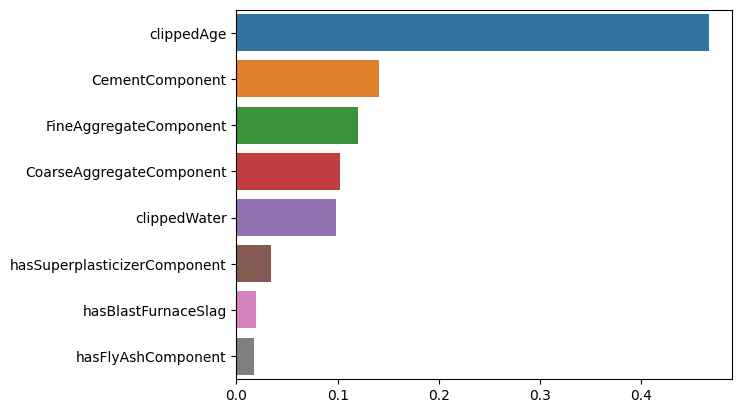

In [282]:
dtr_data = pd.Series(model_dtr.feature_importances_, X_train.columns)

dtr_data.sort_values(ascending = False, inplace = True) # inplace = True, 원본 수정

print(dtr_data)
sns.barplot( x = dtr_data, y = dtr_data.index)

## Cross validation

### CV: Linear Regressor

In [283]:
from sklearn.model_selection import cross_val_score

scores_lr = cross_val_score(model_lr, X_train, y_train, scoring = "neg_mean_squared_error", cv = 100)

predictions_lr_cv = model_lr.predict(X_valid)

rmse_lr_cv = np.sqrt(mean_squared_error(y_valid, predictions_lr_cv))
print("Root Mean Squared Error_lr_cv:", rmse_lr_cv ) # Results : Root Mean Squared Error_lrcv: 11.972031876036043

Root Mean Squared Error_lr_cv: 11.972031876036043


### CV: Decision Tree Regressor

In [284]:
from sklearn.model_selection import cross_val_score

scores_dtr = cross_val_score(model_dtr, X_train, y_train, scoring = "neg_mean_squared_error", cv = 100)


predictions_dtr_cv = model_dtr.predict(X_valid)

rmse_dtr_cv = np.sqrt(mean_squared_error(y_valid, predictions_dtr_cv))
print("Root Mean Squared Error_dtr_cv:", rmse_dtr_cv ) # Results : Root Mean Squared Error_dtr_cv: 15.19620060438491

Root Mean Squared Error_dtr_cv: 15.19620060438491


## Ridge Model

In [285]:
from sklearn.linear_model import Ridge

alphas = [0, 1, 10, 100]

best_alpha = None
best_rmse = float('inf')

for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    scores_ridge = cross_val_score(ridge, X_train, y_train, scoring="neg_mean_squared_error", cv=100)
    rmse_ridge = np.sqrt(-1 * scores_ridge.mean())
    print("Alpha:", alpha, "RMSE:", rmse_ridge)

    if rmse_ridge < best_rmse:
        best_rmse = rmse_ridge
        best_alpha = alpha

best_ridge_model = Ridge(alpha=best_alpha)
result_RM = best_ridge_model.fit(X_train, y_train)


predictions_ridge = best_ridge_model.predict(X_valid)

rmse_ridge = np.sqrt(mean_squared_error(y_valid, predictions_ridge))

print("Root Mean Squared Error_dtr_cv:", rmse_ridge ) # Results : Root Mean Squared Error_dtr_cv: 11.97155372284869

# Submission
# prediction = results_lr.predict(X_test)
# submission['Strength'] = prediction
# submission.to_csv('submission_lr.csv', index = False)

Alpha: 0 RMSE: 12.38845398272354
Alpha: 1 RMSE: 12.388426275535853
Alpha: 10 RMSE: 12.388282307597848
Alpha: 100 RMSE: 12.392874017166678
Root Mean Squared Error_dtr_cv: 11.97155372284869


## Ensemble

In [286]:
from sklearn.ensemble import RandomForestRegressor

model_rfr = RandomForestRegressor()
results_rfr = model_rfr.fit(X_train, y_train)

prediction = results_rfr.predict(X_valid)

mse_rfr = mean_squared_error(y_valid, prediction)
rmse_rfr = np.sqrt(mse_rfr)
print("Mean Squared Error_rfr:", rmse_rfr) # Result : Mean Squared Error_rfr: 12.466514735957922

Mean Squared Error_rfr: 12.466514735957922


In [287]:
# # Submission
# prediction = results_rfr.predict(X_sub)
# submission['Strength'] = prediction
# submission.to_csv('submission_ESB.csv', index = False)

# # Results : Private-13.12567, Public-13.05343

clippedAge                      0.453600
CementComponent                 0.150863
CoarseAggregateComponent        0.116454
FineAggregateComponent          0.110711
clippedWater                    0.105169
hasSuperplasticizerComponent    0.031652
hasBlastFurnaceSlag             0.017804
hasFlyAshComponent              0.013747
dtype: float64


<Axes: >

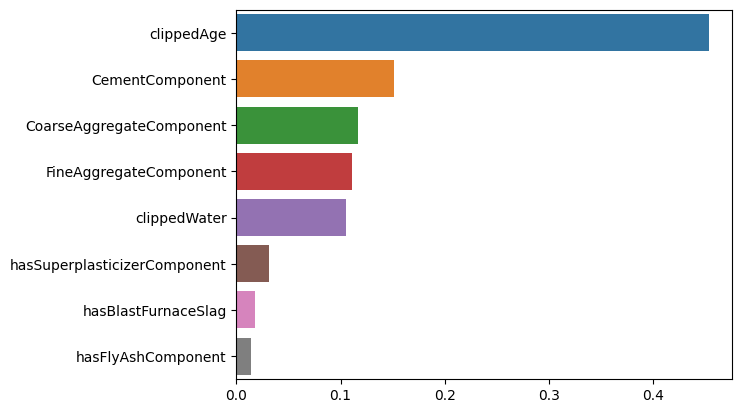

In [288]:
rfr_data = pd.Series(model_rfr.feature_importances_, index = X_train.columns)

rfr_data.sort_values(ascending = False, inplace = True) # inplace = True, 원본 수정

print(rfr_data)
sns.barplot( x = rfr_data, y = rfr_data.index)

# Model Fine Tunning

## 규제 기본 모델 + cv + grid search + 하이퍼파라미터

In [289]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [290]:
model_lasso = Lasso()
param_grid = {
    'max_iter':[1000, 2000, 3000],
    'alpha': 1/np.array([0.01, 0.1, 1, 2, 4, 8, 10, 100, 200, 300])
}


grid = GridSearchCV(model_lasso, param_grid, scoring = 'neg_root_mean_squared_error', cv=5, return_train_score = True)
grid.fit(X_train, y_train)

print(grid.best_params_, -1*grid.best_score_)

best_alpha = 1 / grid.best_params_['alpha']
best_max_iter = grid.best_params_['max_iter']

lasso_model = Lasso(alpha=best_alpha, max_iter=best_max_iter)
lasso_model.fit(X_train, y_train)

predictions_lsso_grid_cv = lasso_model.predict(X_valid)

rmse_grid_cv = np.sqrt(mean_squared_error(y_valid, predictions_lsso_grid_cv))

print("Root Mean Squared Error on Test Data:", rmse_grid_cv) # Results: Root Mean Squared Error on Test Data: 16.362683595328882

{'alpha': 0.0033333333333333335, 'max_iter': 1000} 12.377208990701728
Root Mean Squared Error on Test Data: 16.362683595328882


## 앙상블 + cv + grid search + 하이퍼파라미터

In [291]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()

param_grid = {
    'n_estimators':[100, 200, 300],
    'random_state': [0, 20, 42]
}

grid = GridSearchCV(model, param_grid, scoring = 'neg_root_mean_squared_error', cv=5)
grid.fit(X_train, y_train)

print(grid.best_params_, -1*grid.best_score_)

best_n_estimators = grid.best_params_['n_estimators']
best_random_state = grid.best_params_['random_state']

model_grid_rfr = RandomForestRegressor(n_estimators=best_n_estimators, random_state=best_random_state)
model_grid_rfr.fit(X_train, y_train)

predictions_grid_ESB = model_grid_rfr.predict(X_valid)

rmse_grid_ESB = np.sqrt(mean_squared_error(y_valid, predictions_grid_ESB))

print("Root Mean Squared Error on Validation Data:", rmse_grid_ESB) # Results: Root Mean Squared Error on Validation Data: 12.409750265559804

{'n_estimators': 300, 'random_state': 42} 13.153733580360253
Root Mean Squared Error on Validation Data: 12.409750265559804


In [292]:
# # Submission
# prediction = model_grid_rfr.predict(X_sub)
# submission['Strength'] = prediction
# submission.to_csv('submission_grid_ESB.csv', index = False) # Results : Private-13.12033, Public-13.05536

## AutoML_파이캐럿

In [293]:
!pip install -q pycaret

In [294]:
!pip install -q catboost

In [295]:
!pip install --upgrade -q xgboost

## 모듈 가져오기

In [296]:
from pycaret.regression import *

## 데이터 풀 구성

In [297]:
# X_train_scaled_df = X_train
# X_train_scaled_df

In [298]:
X = pd.concat( [X_train, X_valid] )
y = pd.concat( [y_train, y_valid] )

X.shape, y.shape

((5407, 8), (5407,))

In [299]:
reg = setup( data=X,
             target= y,
             verbose=True,
             train_size=0.75,
             data_split_shuffle=True,
             normalize=True,
             session_id=100)

,Description,Value
0,Session id,100
1,Target,Strength
2,Target type,Regression
3,Original data shape,"(5407, 9)"
4,Transformed data shape,"(5407, 9)"
5,Transformed train set shape,"(4055, 9)"
6,Transformed test set shape,"(1352, 9)"
7,Numeric features,5
8,Preprocess,True
9,Imputation type,simple


In [300]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [301]:
top10_models = compare_models(fold = 5, round = 3, n_select = 10, errors = 'ignore')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.456,150.153,12.248,0.444,0.383,0.362,0.742
lr,Linear Regression,9.553,152.663,12.351,0.435,0.387,0.368,1.472
ridge,Ridge Regression,9.553,152.662,12.351,0.435,0.387,0.368,0.132
lar,Least Angle Regression,9.553,152.663,12.351,0.435,0.387,0.368,0.118
br,Bayesian Ridge,9.554,152.658,12.351,0.435,0.387,0.369,0.076
huber,Huber Regressor,9.456,153.777,12.396,0.430,0.383,0.353,0.092
catboost,CatBoost Regressor,9.640,157.148,12.527,0.419,0.391,0.365,2.802
llar,Lasso Least Angle Regression,9.833,157.336,12.539,0.417,0.398,0.389,0.060
lasso,Lasso Regression,9.833,157.336,12.539,0.417,0.398,0.389,0.124
lightgbm,Light Gradient Boosting Machine,9.681,158.296,12.573,0.414,0.391,0.364,1.080


Processing:   0%|          | 0/94 [00:00<?, ?it/s]

In [302]:
top10_models

[GradientBoostingRegressor(random_state=100),
 LinearRegression(n_jobs=-1),
 Ridge(random_state=100),
 Lars(random_state=100),
 BayesianRidge(),
 HuberRegressor(),
 LassoLars(random_state=100),
 Lasso(random_state=100),
 LGBMRegressor(n_jobs=-1, random_state=100)]

In [303]:
reg_blended = blend_models(estimator_list = top10_models, fold = 5)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,9.3046,143.5048,11.9793,0.4419,0.3743,0.3546
1,9.5151,150.8504,12.2821,0.4719,0.3900,0.3814
2,9.7694,154.0141,12.4102,0.4127,0.4001,0.3870
3,9.0334,136.5398,11.6850,0.4758,0.3778,0.3602
4,9.6567,162.5750,12.7505,0.4298,0.3767,0.3408
Mean,9.4558,149.4968,12.2214,0.4464,0.3838,0.3648
Std,0.2621,8.9114,0.3648,0.0243,0.0098,0.0171


Processing:   0%|          | 0/6 [00:00<?, ?it/s]

In [304]:
model = finalize_model(reg_blended)
model

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CementComponent',
                                             'CoarseAggregateComponent',
                                             'FineAggregateComponent',
                                             'clippedWater', 'clippedAge'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', Transfo...
                                              Lars(random_state=100)),
                                             ('Bayesian Ridge',
                                              BayesianRidge()),
                                             ('Huber Regressor',
                                              HuberRegressor()),
                                             ('CatBoost Regressor',
                                              <catboost.core.CatBoostRegressor object at 0x78ce2f6b0a30>),
                                             ('Lasso Least Angle Regression',
                                              LassoLars(random_state=100)),
                                             ('Lasso Regression',
                                              Lasso(random_state=100)),
                                             ('Light Gradient Boosting Machine',
                                              LGBMRegressor(n_jobs=-1,
                                                            random_state=100))],
                                 n_jobs=-1))])

In [305]:
predict_model(model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Voting Regressor,8.9319,134.7245,11.6071,0.4904,0.3707,0.3498


,CementComponent,CoarseAggregateComponent,FineAggregateComponent,clippedWater,clippedAge,hasBlastFurnaceSlag,hasFlyAshComponent,hasSuperplasticizerComponent,Strength,prediction_label
1236,425.000000,852.099976,887.099976,160.000000,40,True,False,True,66.820000,56.890089
1149,310.000000,1012.000000,830.000000,192.000000,7,False,False,False,17.219999,19.653331
634,350.000000,974.000000,775.000000,203.000000,14,False,False,False,27.680000,25.238130
2579,144.000000,878.000000,728.000000,212.000000,28,True,True,True,29.230000,34.174458
3576,200.000000,965.400024,806.200012,192.000000,28,True,False,False,26.059999,34.147722
...,...,...,...,...,...,...,...,...,...,...
724,139.600006,1047.000000,806.900024,192.000000,3,True,False,False,27.940001,14.936785
215,540.000000,1125.000000,613.000000,173.000000,14,False,False,False,15.520000,30.727765
1018,218.199997,1075.699951,792.700012,160.000000,40,True,True,True,57.209999,49.040901
1005,166.800003,867.200012,611.799988,175.500000,28,True,True,True,23.639999,34.936056


In [306]:
# X_valid

In [307]:
from sklearn.metrics import mean_squared_error

# 예측
prediction = predict_model(model, data = X_valid)
# 평가
mse_rfr = mean_squared_error(y_valid, prediction.prediction_label.values)
rmse_rfr = np.sqrt(mse_rfr)

print("Mean Squared Error_rfr:", rmse_rfr) # Result : Mean Squared Error_rfr: 11.42173714026483

Mean Squared Error_rfr: 11.42173714026483


In [308]:
# Submission

prediction = predict_model(model, data = X_sub)
submission['Strength'] = prediction.prediction_label.values
submission.to_csv('submission_top10_nonScaler_final.csv', index = False)

# Results : Private-12.25668, Public-11.87501  <16>

- Trying Top1 model

In [309]:
top1_models = compare_models(fold = 5, round = 3, n_select = 1, errors = 'ignore')

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
gbr,Gradient Boosting Regressor,9.456,150.153,12.248,0.444,0.383,0.362,0.516
lr,Linear Regression,9.553,152.663,12.351,0.435,0.387,0.368,0.072
ridge,Ridge Regression,9.553,152.662,12.351,0.435,0.387,0.368,0.070
lar,Least Angle Regression,9.553,152.663,12.351,0.435,0.387,0.368,0.086
br,Bayesian Ridge,9.554,152.658,12.351,0.435,0.387,0.369,0.042
huber,Huber Regressor,9.456,153.777,12.396,0.430,0.383,0.353,0.052
catboost,CatBoost Regressor,9.640,157.148,12.527,0.419,0.391,0.365,2.886
llar,Lasso Least Angle Regression,9.833,157.336,12.539,0.417,0.398,0.389,0.084
lasso,Lasso Regression,9.833,157.336,12.539,0.417,0.398,0.389,0.082
lightgbm,Light Gradient Boosting Machine,9.681,158.296,12.573,0.414,0.391,0.364,1.362


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [310]:
model_top1 = finalize_model(top1_models)
model_top1

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['CementComponent',
                                             'CoarseAggregateComponent',
                                             'FineAggregateComponent',
                                             'clippedWater', 'clippedAge'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=StandardScaler())),
                ('actual_estimator',
                 GradientBoostingRegressor(random_state=100))])

In [311]:
predict_model(model_top1)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Gradient Boosting Regressor,8.8493,133.0713,11.5357,0.4967,0.3672,0.3429


,CementComponent,CoarseAggregateComponent,FineAggregateComponent,clippedWater,clippedAge,hasBlastFurnaceSlag,hasFlyAshComponent,hasSuperplasticizerComponent,Strength,prediction_label
1236,425.000000,852.099976,887.099976,160.000000,40,True,False,True,66.820000,59.656775
1149,310.000000,1012.000000,830.000000,192.000000,7,False,False,False,17.219999,19.500447
634,350.000000,974.000000,775.000000,203.000000,14,False,False,False,27.680000,24.708914
2579,144.000000,878.000000,728.000000,212.000000,28,True,True,True,29.230000,33.580275
3576,200.000000,965.400024,806.200012,192.000000,28,True,False,False,26.059999,34.756871
...,...,...,...,...,...,...,...,...,...,...
724,139.600006,1047.000000,806.900024,192.000000,3,True,False,False,27.940001,14.779756
215,540.000000,1125.000000,613.000000,173.000000,14,False,False,False,15.520000,25.768986
1018,218.199997,1075.699951,792.700012,160.000000,40,True,True,True,57.209999,48.679560
1005,166.800003,867.200012,611.799988,175.500000,28,True,True,True,23.639999,31.536855


In [316]:
# 예측
prediction = predict_model(model_top1, data = X_valid)

mse_rfr = mean_squared_error(y_valid, prediction.prediction_label.values)
rmse_rfr = np.sqrt(mse_rfr)

print("Mean Squared Error_rfr:", rmse_rfr) # Result : Mean Squared Error_rfr: 11.29058819319657

Mean Squared Error_rfr: 11.29058819319657


In [313]:
# # Submission
# prediction = predict_model(model_top1, data = X_sub)
# submission['Strength'] = prediction.prediction_label.values
# submission.to_csv('submission_model_top1.csv', index = False)

# # Results : Private-12.32076, Public-11.90099